# Veri Ön İşleme

### 1. Aykırı Gözlem

### 1.1 Aykırı Değerlerin Tespiti

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

df=pd.read_csv("dataset/youtubeGB.csv") 
youtube=df.copy()

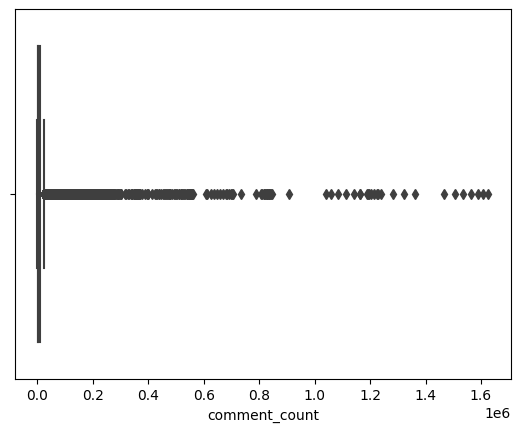

In [21]:
# Kutu grafiği (Box plot), verinin dağılımını çeyrek değerler üzerinden görselleştiren bir grafik türüdür.
sns.boxplot(x=youtube["comment_count"]);

#### Kutunun alt ve üst kenarları, 25. ve 75. çeyrek değerlerini temsil eder.

#### Aradaki fark çeyrek açıklığını (IQR), yani orta %50’lik değeri temsil eder.

#### Kutu grafiğinin ortasındaki çizgi, ortanca (medyan) değeri verir.

#### Alt ve üst kancaların dışında kalan noktalar aykırı değerleri temsil eder.

In [22]:
# Şimdi kendi veri setimiz üzerindeki yorum sayısı alanı için Q1, Q3 ve IQR değerlerini bulalım.
Q1 = youtube["comment_count"].quantile(0.25)
Q3 = youtube["comment_count"].quantile(0.75)
IQR = Q3-Q1

print(Q1)
print(Q3)
print(IQR)

679.0
9241.5
8562.5


In [23]:
# Alt ve üst sınırları hesaplayalım.
altSinir = Q1- 1.5*IQR
ustSinir = Q3 + 1.5*IQR

print(altSinir)
print(ustSinir)

-12164.75
22085.25


In [24]:
# Yorum sayısı alanındaki değerler için alt sınır değerinden küçük olanlar veya üst sınır değerinden büyük olanlara bakalım.
(youtube["comment_count"] < altSinir) | (youtube["comment_count"] > ustSinir)

0        False
1        False
2         True
3        False
4        False
         ...  
38911    False
38912     True
38913    False
38914     True
38915    False
Name: comment_count, Length: 38916, dtype: bool

In [25]:
# Aykırı değerlerin neler olduğunu listeleyelim.
aykiri=(youtube["comment_count"] < altSinir) | (youtube["comment_count"] > ustSinir)
youtube["comment_count"][aykiri]

2        125882
6         85067
53        59482
93        34911
97        23030
          ...  
38893     27343
38902     37560
38904     23450
38912     24330
38914     26766
Name: comment_count, Length: 4915, dtype: int64

Yukarıdaki çıktıya baktığımızda toplam 4915 değerin aykırı değer olduğunu görmekteyiz.

In [26]:
# Aykırı değerlerin index numaralarını listeliyoruz.
youtube["comment_count"][aykiri].index

Int64Index([    2,     6,    53,    93,    97,   104,   140,   147,   166,
              219,
            ...
            38854, 38859, 38863, 38875, 38883, 38893, 38902, 38904, 38912,
            38914],
           dtype='int64', length=4915)

### 1.2. Aykırı Değerler Sorununun Çözülmesi

#### 1.2.1. Baskılama Yöntemi

Baskılama Yönteminde değerler Alt veya Üst sınır değerine eşitlenir.

In [27]:
# Biz burada üst sınır değerine eşitleyerek aykırı değerler sorununu çözelim.
print(altSinir)
print(ustSinir)

aykiri_alt = (youtube["comment_count"] < altSinir) 
aykiri_ust= (youtube["comment_count"] > ustSinir)
youtube["comment_count"][aykiri_alt] = altSinir
youtube["comment_count"][aykiri_ust] = ustSinir

youtube["comment_count"][aykiri] # Baskılama yöntemi uyguladığımız yorum sayısı alanının listelenmesi

-12164.75
22085.25


C:\Users\pc\AppData\Local\Temp\ipykernel_7404\48686256.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  youtube["comment_count"][aykiri_alt] = altSinir
C:\Users\pc\AppData\Local\Temp\ipykernel_7404\48686256.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  youtube["comment_count"][aykiri_ust] = ustSinir


2        22085.25
6        22085.25
53       22085.25
93       22085.25
97       22085.25
           ...   
38893    22085.25
38902    22085.25
38904    22085.25
38912    22085.25
38914    22085.25
Name: comment_count, Length: 4915, dtype: float64

### 2. Eksik Veri Analizi

### 2.1. Eksik Veri Yapısının Görselleştirilmesi

In [28]:
!pip install missingno


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


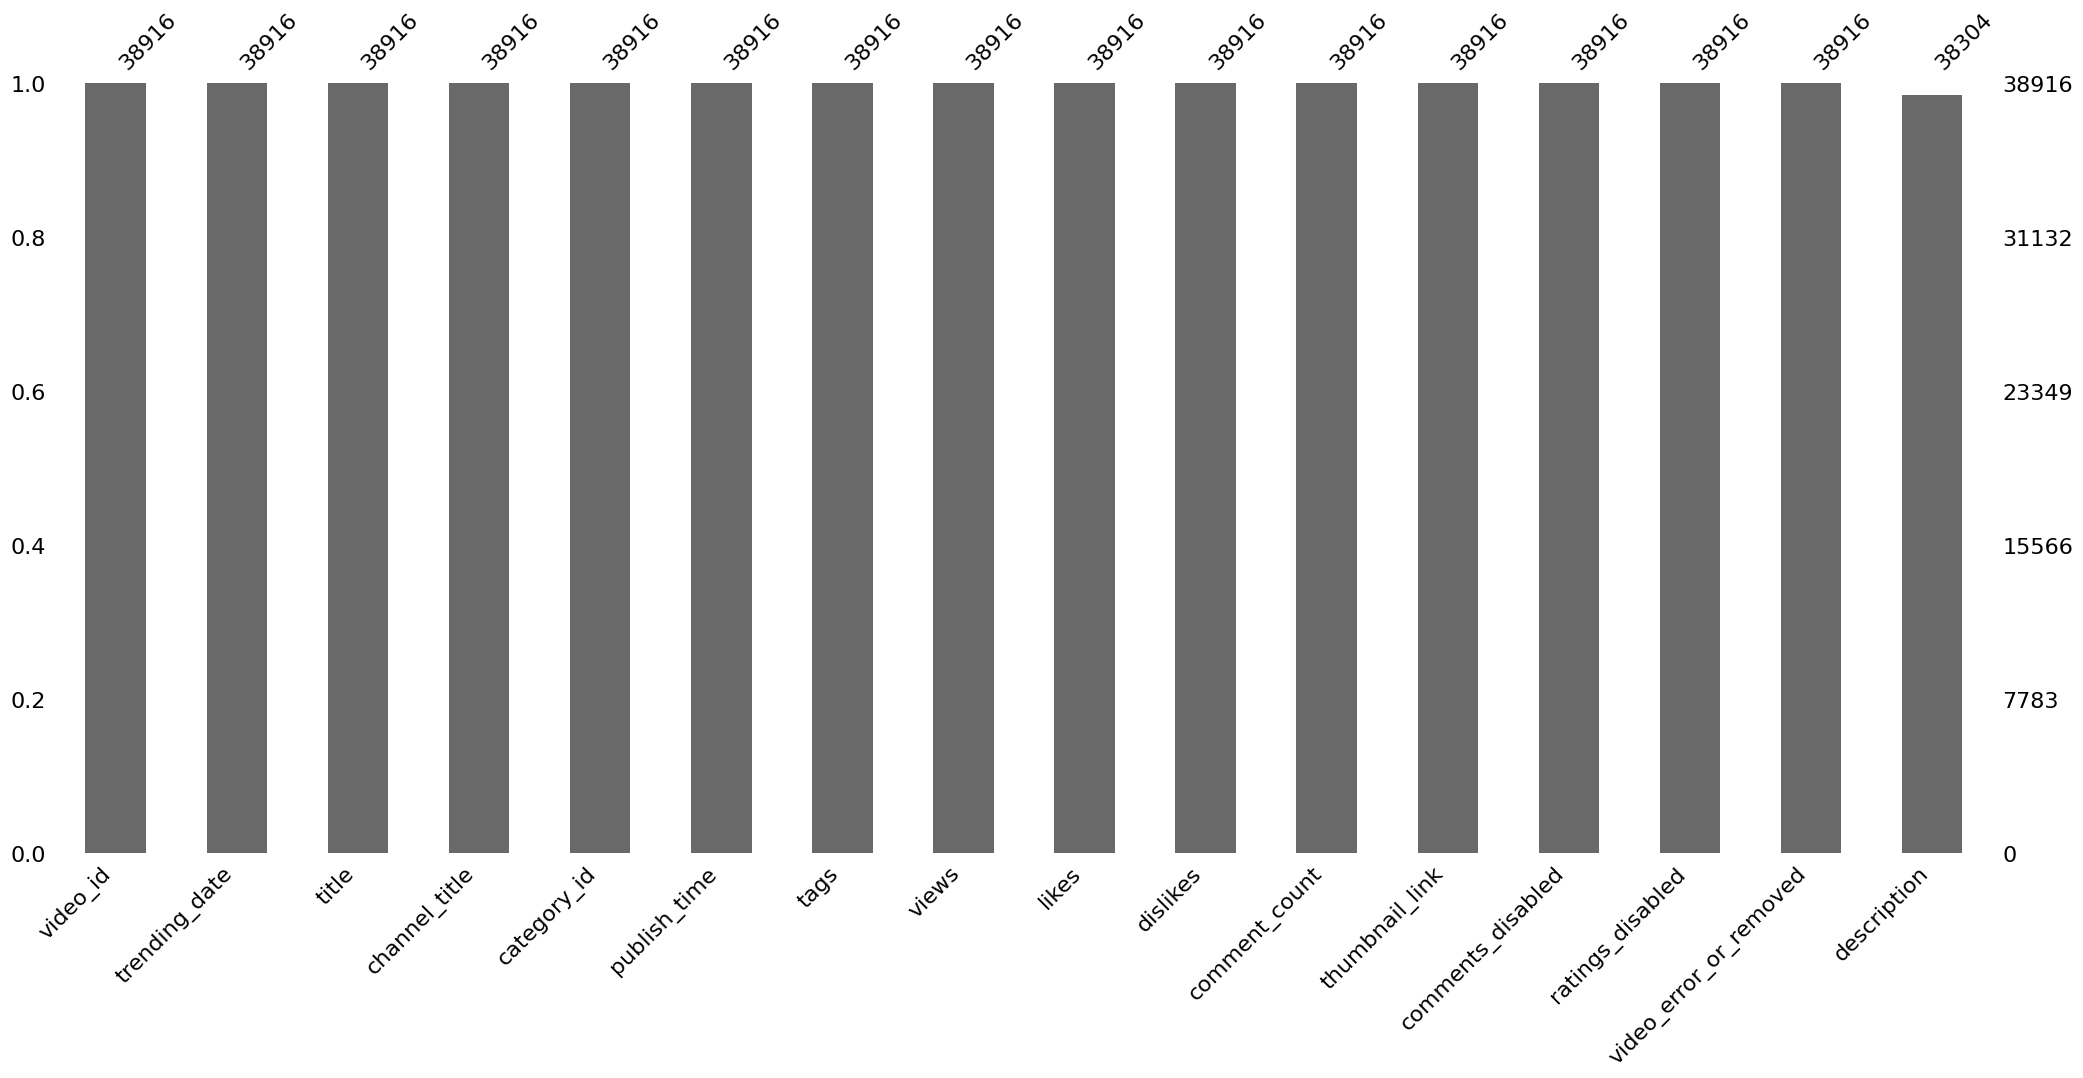

In [29]:
import missingno as msno
msno.bar(youtube);

Yukarıdaki grafiğe baktığımızda description alanında 38304 veri olduğu için bu alanda null değer içerdiğini gözlemlemekteyiz.

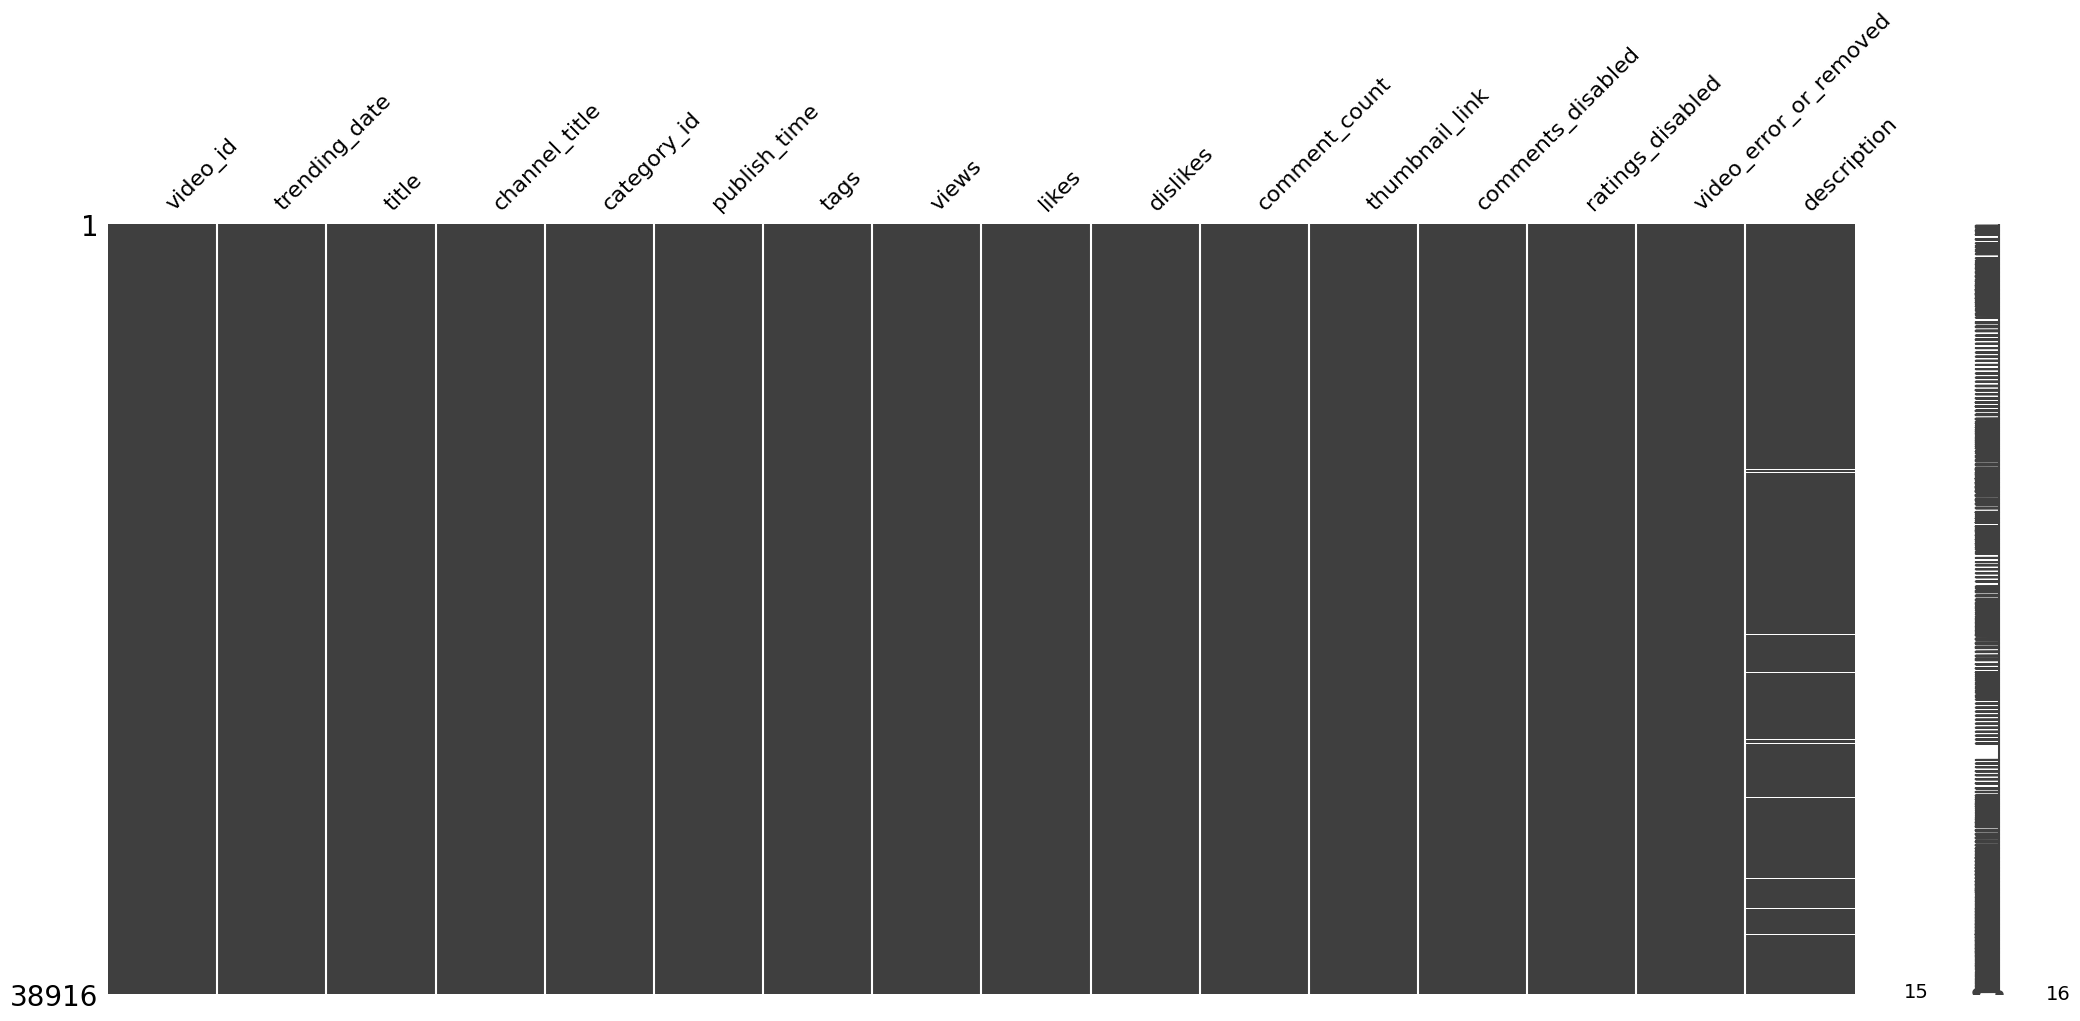

In [30]:
# Veri setindeki eksik verileri bir de matris biçiminde inceleyelim.
msno.matrix(youtube);

#### Eksik Değerlerin Tespit edilmesi

In [31]:
# Hangi değişkenlerde kaç adet null ya da NaN değer var?
youtube.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               612
dtype: int64

In [32]:
# tags alanında [none] içeren değerlerin toplamını da bulalım.
youtube[youtube["tags"]=="[none]"]["tags"].count()

2010

In [33]:
# En az bir eksik değer varsa seçer ve bu kayıtların title alanlarını listeler.
youtube[youtube.isnull().any(axis = 1)]["title"]

91                                       Bone on Labour HQ
118                                Arvo Pärt - Tabula Rasa
187                                 Brad Bufanda Demo Reel
309                                      Bone on Labour HQ
336                                Arvo Pärt - Tabula Rasa
                               ...                        
38511    Snoop Dogg Weighs In On Kanye's Controversial ...
38560                             Getting some air, Atlas?
38639    Sheldon makes a friend and invites him for din...
38735                             Getting some air, Atlas?
38815    Sheldon makes a friend and invites him for din...
Name: title, Length: 612, dtype: object

In [34]:
# tags alanında [none] içeren değerleri no tags ile değiştirelim.
youtube[youtube["tags"]=="[none]"].replace("[none]","no tags")[["title","tags"]]

,title,tags
4,Dashcam captures truck's near miss with child ...,no tags
65,Waking Up with Sam Harris #103 - American Fant...,no tags
86,The reputation Secret Sessions,no tags
91,Bone on Labour HQ,no tags
155,TYSON FURY TO ANTHONY JOSHUA - YOU AINT SEEN *...,no tags
...,...,...
38750,BABYMETAL - Distortion (OFFICIAL),no tags
38814,Bumblebee (2018) - Official Teaser Trailer - P...,no tags
38825,Choco Mountain: The History of Mario Kart 64's...,no tags
38884,Charmed (The CW) Trailer HD - 2018 Reboot,no tags


In [35]:
youtube.dropna()["description"].count()
# Null değerler silindikten sonra description alanında kalan kayıt sayısı

38304

#### Basit Değer Atama

In [36]:
# Öncelikle description olanında null olan değerleri "no input" ile dolduralım. Ardından bu şekilde doldurduğumuz kayıtlardan 
# ilk 10 tanesini listeleyelim.
youtube["description"].fillna(value="no input",inplace=True) 
                                             # inplace=True => Değişikliğin dataframe'in orijinaline de yansıması için
youtube[youtube["description"]=="no input"][["title","description"]].head(10)

,title,description
91,Bone on Labour HQ,no input
118,Arvo Pärt - Tabula Rasa,no input
187,Brad Bufanda Demo Reel,no input
309,Bone on Labour HQ,no input
336,Arvo Pärt - Tabula Rasa,no input
394,Brad Bufanda Demo Reel,no input
521,Bone on Labour HQ,no input
546,Arvo Pärt - Tabula Rasa,no input
760,Bone on Labour HQ,no input
787,Arvo Pärt - Tabula Rasa,no input


In [37]:
youtube["description"].isnull().sum() # Null değerleri no input ile doldurduğumuz için artık eksik veri yok.

0

### 3. Değişken Dönüşümleri


### 3.1. Değişken - Index, Index - Değişken Dönüşümleri

Index'ler 0 rakamından başladığı için 1'den başlatmak istersek aşağıdaki adımları yapabiliriz.

In [126]:
youtube["yeniDegisken"]=youtube.index+1
youtube[["title","yeniDegisken"]].head() # Kayıtlardan ilk 5'ini listeler.

,title,yeniDegisken
0,John Lewis Christmas Ad 2017 - #MozTheMonster,1
1,Taylor Swift: …Ready for It? (Live) - SNL,2
2,Eminem - Walk On Water (Audio) ft. Beyoncé,3
3,Goals from Salford City vs Class of 92 and Fri...,4
4,Dashcam captures truck's near miss with child ...,5


In [127]:
youtube.index=youtube["yeniDegisken"] # Veri setinde index alanına oluşturduğumuz yeniDegisken kolonunu atıyoruz.
youtube[["title","yeniDegisken"]].head()

,title,yeniDegisken
yeniDegisken,,
1,John Lewis Christmas Ad 2017 - #MozTheMonster,1
2,Taylor Swift: …Ready for It? (Live) - SNL,2
3,Eminem - Walk On Water (Audio) ft. Beyoncé,3
4,Goals from Salford City vs Class of 92 and Fri...,4
5,Dashcam captures truck's near miss with child ...,5
